In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [6]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [7]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [8]:
# reflect an existing database into a new model
base = automap_base()
# reflect the tables
base.prepare(engine, reflect = True)

In [9]:
# View all of the classes that automap found
base.classes.keys()

['measurement', 'station']

In [10]:
# Save references to each table
measurement = base.classes.measurement
station = base.classes.station

In [11]:
# Create our session (link) from Python to the DB
session = Session(engine)


# Exploratory Precipitation Analysis

In [12]:
# Find the most recent date in the data set.
date = session.query(measurement.id,measurement.date)
most_recent_date = date.order_by(measurement.date.desc()).first()
print(most_recent_date[1])

2017-08-23


In [19]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
one_year_from_last = dt.date(2017, 8, 23) - dt.timedelta(days=365)
print(one_year_from_last)


2016-08-23


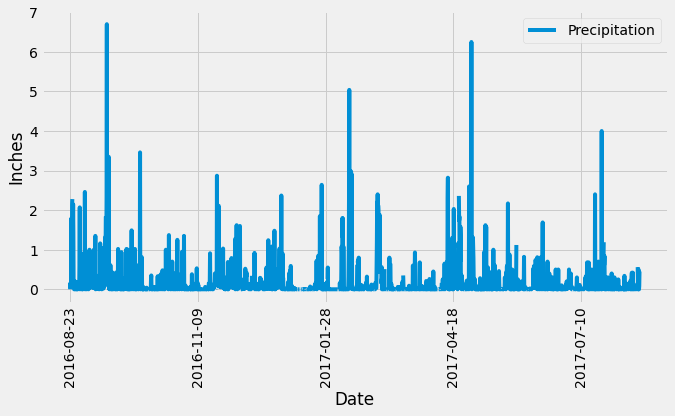

In [33]:
# Perform a query to retrieve the data and precipitation scores
precipitation_scores = session.query(measurement.date, measurement.prcp,).\
    filter(measurement.date >= previous_year).\
    order_by(measurement.date).all()


# Save the query results as a Pandas DataFrame and set the index to the date column
new_df = pd.DataFrame(precipitation_scores, columns = ['Date','Precipitation'])
new_df.set_index('Date', inplace = True)
new_df.head(10)

# Sort the dataframe by date
by_date_df =new_df.sort_index()


# Use Pandas Plotting with Matplotlib to plot the data
plot = by_date_df.plot(figsize=(10,5),rot=90);
plot.set_ylabel("Inches");

In [34]:
# Use Pandas to calcualte the summary statistics for the precipitation data
by_date_df.describe()


,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [35]:
# Design a query to calculate the total number stations in the dataset
session.query(measurement.station).distinct().count()


9

In [36]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
most_active_stations = session.query(measurement.station,func.count(measurement.station)).\
group_by(measurement.station).\
order_by(func.count(measurement.station).desc()).all()
most_active_stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [39]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
temp = [func.min(measurement.tobs),func.max(measurement.tobs),func.avg(measurement.tobs)]
most_active_station = session.query(*temp).group_by(measurement.station).order_by(func.count(measurement.id).desc()).first()
most_active_station

(54.0, 85.0, 71.66378066378067)

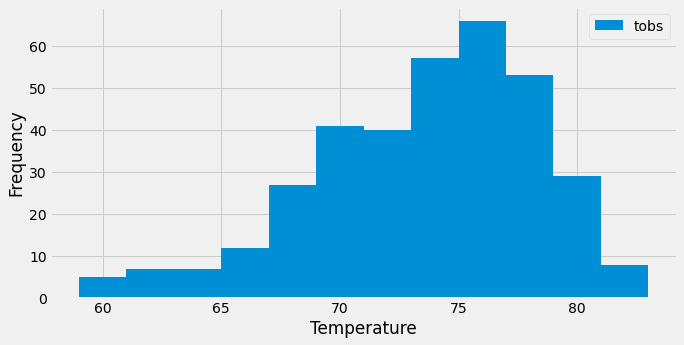

In [42]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
last_12 = session.query(measurement.tobs).\
    filter(measurement.station == 'USC00519281').\
    filter(measurement.date >= '2016-08-23').all()
last_12_df = pd.DataFrame(last_12)
last_12_df.plot.hist(bins=12,label="tobs",figsize=(10,5))
plt.ylim=(0,60)
plt.ylabel("Frequency")
plt.xlabel("Temperature")
plt.show()

# Close session

In [43]:
# Close Session
session.close()